Los datos que usará google colab. La información está en:

1. new_base_dir almacena el path de la BD reducida con la que se entrenará en este ejemplo. Dentro debe tener tres carpetas: train, test y validation y dentro de cada una, dos carpetas: Manga y Comic


In [1]:
!pip install gdown #Instala una librería para descargar archivos de Google Drive
#https://drive.google.com/file/d/1Bj80lhp2N_tzoMMHVaRBdSYToI7t0Poh/view?usp=sharing
!gdown --id 1Bj80lhp2N_tzoMMHVaRBdSYToI7t0Poh #Descarga el daataset que está en el Drive del Prof. Toro
!unzip manga_comic.zip #Descomprime el archivo del dataset
from IPython.display import Image #Librería para visualizar imágenes en Jupyter
new_base_dir=r"manga_comic"


Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: manga_comic/train/Comic/1848.png  
 extracting: manga_comic/train/Comic/1849.png  
  inflating: manga_comic/train/Comic/185.png  
 extracting: manga_comic/train/Comic/1850.png  
 extracting: manga_comic/train/Comic/1851.png  
 extracting: manga_comic/train/Comic/1852.png  
 extracting: manga_comic/train/Comic/1853.png  
 extracting: manga_comic/train/Comic/1854.png  
 extracting: manga_comic/train/Comic/1855.png  
 extracting: manga_comic/train/Comic/1856.png  
 extracting: manga_comic/train/Comic/1857.png  
 extracting: manga_comic/train/Comic/1858.png  
 extracting: manga_comic/train/Comic/1859.png  
 extracting: manga_comic/train/Comic/186.png  
 extracting: manga_comic/train/Comic/1860.png  
  inflating: manga_comic/train/Comic/1861.png  
 extracting: manga_comic/train/Comic/1862.png  
 extracting: manga_comic/train/Comic/1863.png  
 extracting: manga_comic/train/Comic/1864.png  
 extracting: manga_comic/trai

Visualizar una imagen

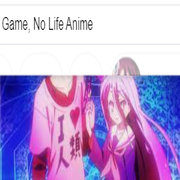

In [2]:
display(Image(filename="manga_comic/train/Manga/1005.png"))

Definición de la red neuronal de 1 neurona para imagénes de 180x180 píxeles

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Flatten()(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense (Dense)               (None, 1)                 97201     
                                                                 
Total params: 97,201
Trainable params: 97,201
Non-trainable params: 0
_________________________________________________________________


Hiperparámetros para el entrenamiento y medición de desempeño

In [4]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Convierte la información de la imagen de píxeles en un tensor numérico de punto flotante y ajusta el tamaño de la imagen porque todas tienen diferente resolución

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir+"/"+"test",
    image_size=(180, 180),
    batch_size=32)

Found 3942 files belonging to 2 classes.
Found 1990 files belonging to 2 classes.
Found 2649 files belonging to 2 classes.


Extrayendo las características de los conjuntos de entrenamiento, validación y prueba con sus etiquetas

In [6]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        all_features.append(images)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

print(test_features.shape)
print(test_labels.shape)

(2649, 180, 180, 3)
(2649,)


Fase de entrenamiento 

In [7]:
history = model.fit(
    train_dataset,
    epochs=4,
    validation_data=validation_dataset)

Epoch 1/4
124/124 [==============================] - 18s 112ms/step - loss: 3476.0366 - accuracy: 0.5099 - val_loss: 3404.3730 - val_accuracy: 0.5015
Epoch 2/4
124/124 [==============================] - 13s 101ms/step - loss: 3162.4226 - accuracy: 0.5074 - val_loss: 4641.6060 - val_accuracy: 0.4990
Epoch 3/4
124/124 [==============================] - 9s 67ms/step - loss: 3024.3398 - accuracy: 0.5233 - val_loss: 1722.8058 - val_accuracy: 0.5482
Epoch 4/4
124/124 [==============================] - 9s 74ms/step - loss: 2922.2795 - accuracy: 0.5342 - val_loss: 2447.3811 - val_accuracy: 0.5045


Visualización de la pérdidad y el accuracy tanto para los datos de entrenamiento como para los datos de validación y así detectar si hay overfitting

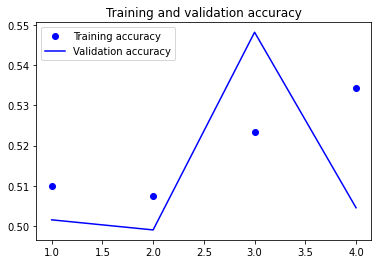

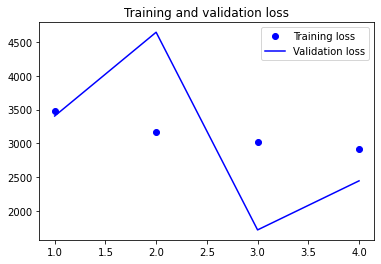

In [8]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Matriz de confusión

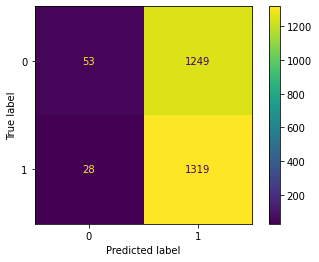

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_predictions = model.predict(test_features)
cm = confusion_matrix(test_labels, test_predictions > 0.5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Cálculo de la exactitud (en inglés, *accurracy*)

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, test_predictions > 0.5))

0.5179312948282371


Ejercicio:
----------
1. Desarrollar un modelo que tenga la mejor exactitud (en inglés, *accurracy*) posible en el conjunto de prueba (en inglés, *test*). Para lograrlo, hay que hacer un entrenamiento sin sobreajustar (en inglés, *overfit*)